# Project: Exploratory Data Analaysis and Machine Learning Modelling - [Zomato Dataset]



### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
        <li><a href="#engineering">Feature Engineering</a></li>
<li><a href="#ml">Machine Learning Models</a></li>
<li><a href="#hpt">Hyperparameter Tuning</a></li>
<li><a href="#summary">Summary and Interpretation</a></li>
</ul>

### Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008

<a id='intro'></a>

> ## Introduction

### Dataset Description 

|Column|Significance|Type|
|:----:|:----:|:----:| 
|  url  | Indicates the restaurant's link on Zomato website   | Categorical |
|  address  | Restaraurant's address | Categorical |
| name  | Restaraurant's name  | Categorical |
| online_order  | Does this restaraunt support online orders?  | Categorical |
| book_table  | Does this restaurant offer table book option? | Categorical |
| rate  |  Indicates restaurant's rating out of 5 | Categorical-Ordinal |
| votes | Number of votes | Numerical |
| phone  |  Restaurant's contact phone number with a prefix country code  | Categorical-Multivalued |
| location  |  Restaurant's location (town/city)  | Categorcial |
| rest_type  |  Restaurant's type   | Categorical-Multivalued |
| dish_liked  | Dished that customers usually prefer | Categorical-Multivalued |
| cuisines  | Available food styles  | Categorical-Multivalued |
| approx_cost(for two people) |  Average cost for two person meal (in Indian Rupee) | Numerical |
| reviews_list | Provides a list of reviews by multiple customers about the review with an overall rating out of 5 | Categorical-Multivalued |
| menu_item |  Provides list of available items in the restaurant's menu | Categorical-Multivalued |
| listed_in(type) | Type of provided meals | Categorical |
|  listed_in(city)  |  Which city the restaurant located in (vaguely similar function to location column)  | Categorical |

#### Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore') # hide annoying warnings
style.use('fivethirtyeight') # for more appealing vizs

### Read CSV and display a brief preview

In [2]:
df=pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


<a id='eda'></a>

> ## Exploratory Data Analysis

### Questions

<ul>
<li><a href="#q1">What is the percentage of restuarants that accepts online orders?</a></li>
<li><a href="#q2">Which city has higher average ratings overall?</a></li>
<li><a href="#q3">What is the most common restaurant type, and which type has the highest average rating?</a></li>
<li><a href="#q4">Does restaurants that provide their services within reasonable prices have better ratings?</a></li>
<li><a href="#q5">Is there any linear correlation between any of the numerical columns in this dataset?</a></li>
<li><a href="#q6">Which cities have the highest purchasing power in Bangalore?</a></li>
<li><a href="#q7">Does a restuarant have a higher average rating if it has both a book table reservation and online order?</a></li>
</ul>

<a id='q1'></a>

### Q1: What is the percentage of restaurants that accepts online orders?

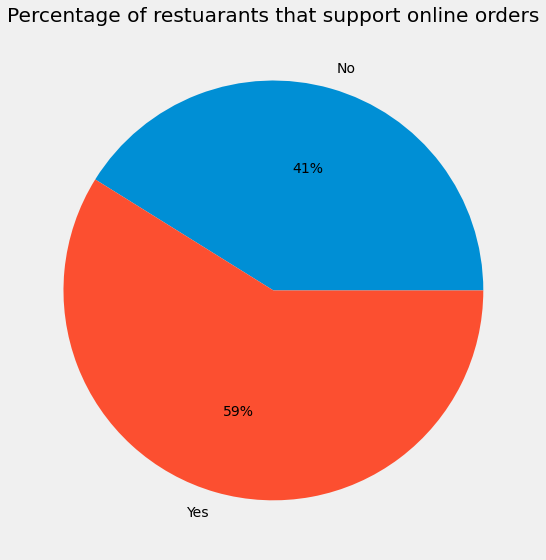

In [4]:
q6=df.groupby('online_order')['online_order'].count()/len(df)
q6.plot(kind='pie',autopct='%1.0f%%',label='',figsize=(8,8));
plt.title("Percentage of restuarants that support online orders")
plt.tight_layout()

#### 59% of restuarants support online orders

<a id='q2'></a>

### Q2: Which city has higher average ratings overall?

#### We need to clean **rate** column

In [5]:
df['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

#### As we can see there are problamatic values

#### Lets clean the **rate** column since its problamatic format will prevent us from extracting useful insight from it and using it later for machine learning

In [6]:
for i in df['rate'].value_counts().index:
    print(i)

NEW
3.9/5
3.8/5
3.7/5
3.9 /5
3.8 /5
3.7 /5
3.6/5
4.0/5
4.0 /5
3.6 /5
4.1 /5
4.1/5
3.5/5
3.5 /5
3.4/5
3.4 /5
3.3/5
4.2 /5
3.3 /5
4.2/5
3.2/5
4.3 /5
3.2 /5
3.1/5
4.3/5
3.1 /5
4.4 /5
3.0/5
4.4/5
3.0 /5
2.9/5
4.5 /5
2.9 /5
2.8/5
2.8 /5
4.5/5
4.6 /5
2.7/5
2.6/5
2.7 /5
4.6/5
2.6 /5
4.7 /5
4.7/5
-
2.5 /5
2.5/5
4.8 /5
2.4/5
4.9 /5
2.4 /5
2.3/5
4.9/5
2.3 /5
4.8/5
2.2/5
2.1 /5
2.1/5
2.2 /5
2.0 /5
2.0/5
1.8 /5
1.8/5


#### Most common rating in descending order to make sure of values homogenity

In [7]:
df["rate"] = df["rate"].replace("NEW", np.nan) # Replace useless values with nan
#df.dropna(axis=0,subset=['rate'],how='any',inplace=True)

#### There is a '-' rating which is equivalent to NA so lets convert it to na too

In [8]:
df["rate"] = df["rate"].replace("-", np.nan)

#### Now lets remove the '/5' from the strings

In [9]:
def remove_5(string: str):
    if type(string)==str:
        new_string=string.split('/')[0]
        return new_string
    return string

In [10]:
df['rate']=df['rate'].apply(remove_5)

#### **rate** column data type is object (string) so lets convert it to be a quantitative categorical variable 

In [11]:
df['rate']=df['rate'].map(float)
#df['rate']=df['rate'].map(str.strip)
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

Text(0.5, 0, 'Rating')

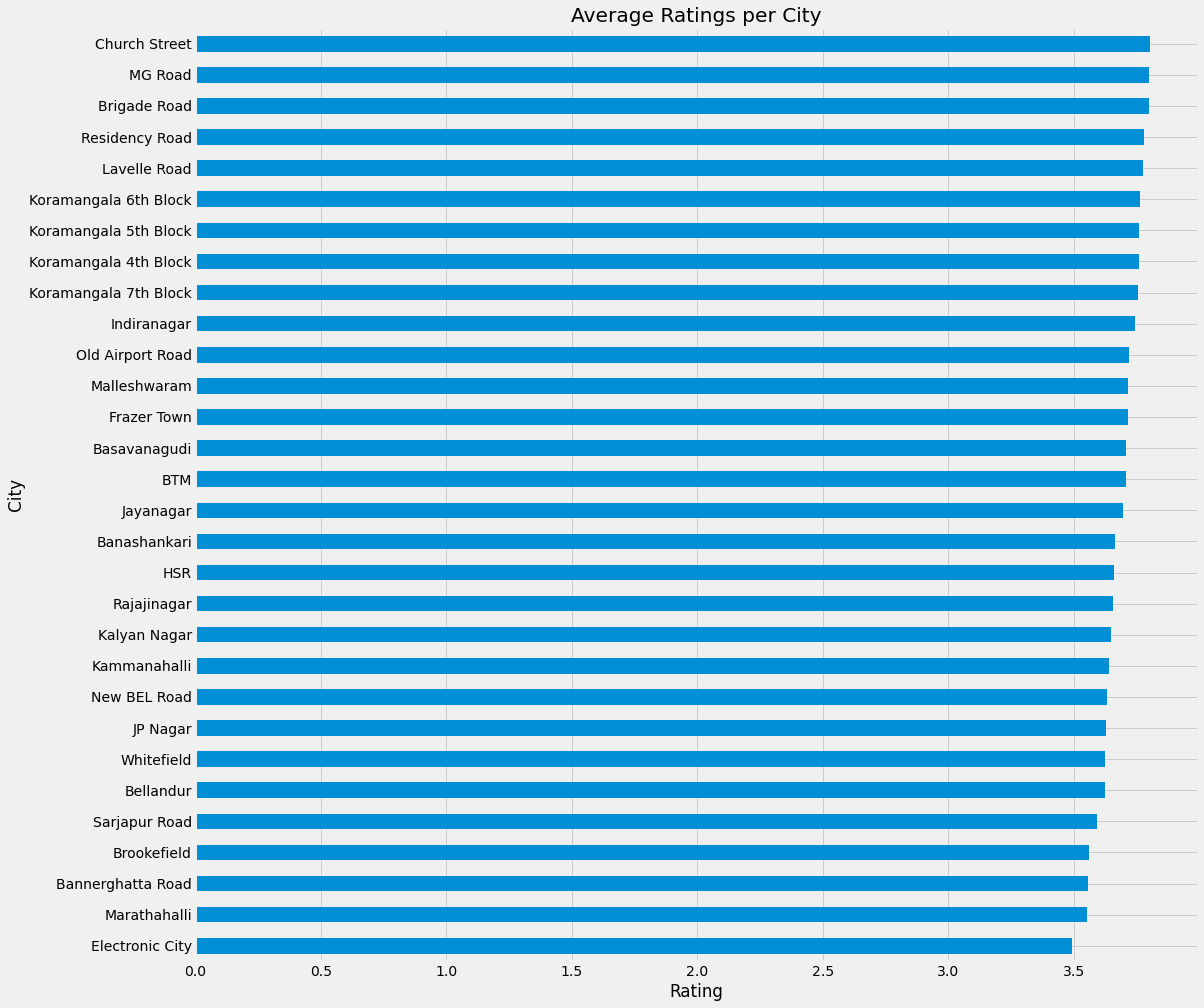

In [12]:
#q1=df['rate'].value_counts()/len(df)#.plot(kind='barh',figsize=(16,16))
#q1.plot(kind='barh',figsize=(16,16))
q1=df.groupby("listed_in(city)")["rate"].mean().sort_values(ascending=True)
q1.plot(kind='barh',figsize=(16,16));
plt.title('Average Ratings per City')
plt.ylabel('City')
plt.xlabel('Rating')

#### **Church Street** has the highest average rating restaurants, while **Electronic City** has the lowest average rating

<a id='q3'></a>
### Q3: What is the most common restuarant type, and which type has the highest average rating?

#### Below are some insights about this column

In [13]:
df['rest_type'].head() # First 5 entries

0          Casual Dining
1          Casual Dining
2    Cafe, Casual Dining
3            Quick Bites
4          Casual Dining
Name: rest_type, dtype: object

In [14]:
df['rest_type'].value_counts() # Most common values

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

#### The most common restuarant type is Quick Bites, below is a simple bar chart for the top 10 restuarant type

<AxesSubplot:>

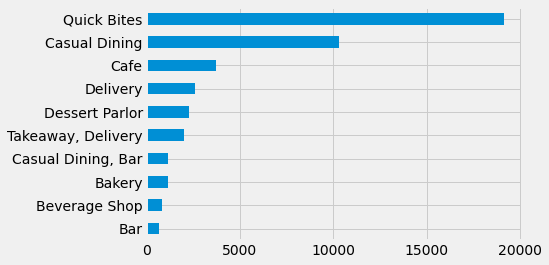

In [15]:
df['rest_type'].value_counts()[0:10].sort_values().plot(kind='barh')

#### Its clear that we need to make this column in 1st normal form / convert each entry with multivalue to a new entry to find which restuarant types are prefered

In [16]:
df['rest_type']=df['rest_type'].map(str) # prevents an error with errounus values
df['rest_type']=df['rest_type'].map(str.strip)
def multivalue_to_list(string: str,sep: chr):
    new=string.split(sep)
    return new

In [17]:
df['rest_type']=df['rest_type'].apply(multivalue_to_list,args=(','))


In [18]:
df=df.explode('rest_type') # a very useful function which converts a list/tuple values into seperate entries
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,Cafe,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,Casual Dining,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari


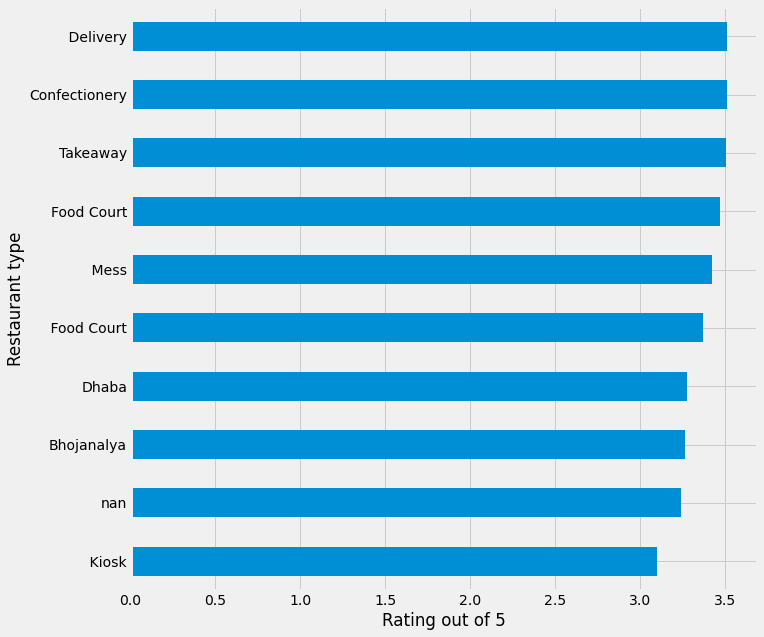

In [19]:
q2=df.groupby('rest_type')['rate'].mean().sort_values(ascending=True)[0:10]

q2.plot(kind='barh',figsize=(10,10));
plt.ylabel('Restaurant type');
plt.xlabel('Rating out of 5');

#### Customers tend to rate restaurant that provide delivery solely or along with other restaurant types highly

<a id='q4'></a>

### Q4: Does restaurants that provide their services within reasonable prices have better ratings?

In [20]:
#df['approx_cost(for two people)']=df['approx_cost(for two people)'].map(float)
df['approx_cost(for two people)'].value_counts() # Most common values

300      8375
400      7486
500      5595
200      5345
600      4218
         ... 
560         1
469         1
5,000       1
3,700       1
160         1
Name: approx_cost(for two people), Length: 70, dtype: int64

In [21]:
for i in df['approx_cost(for two people)'].value_counts().index: # Check if any outlier value exists
    print(i)


300
400
500
200
600
250
800
150
700
1,000
350
450
1,200
1,500
100
550
650
900
750
1,300
1,100
1,400
2,000
1,700
1,600
1,800
3,000
2,500
850
1,900
2,100
2,200
950
2,800
4,000
3,500
2,400
120
180
1,350
3,400
2,600
1,650
2,300
1,250
230
80
40
130
50
199
1,450
4,100
240
1,050
190
330
70
2,700
3,200
360
6,000
4,500
140
60
560
469
5,000
3,700
160


#### Unfortunately there are some values which cannot be treated numerically in python since ',' character exists in some numbers , lets apply a function that manipulates any string that has ',' and removes it then map the column data type to be a numerical

In [22]:
def approperiate_numbers(string: str):
    if type(string)==str: # prevents an error by nan values
        new=string.replace(',','')
        return new
    return string

In [23]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(approperiate_numbers)
df['approx_cost(for two people)']=df['approx_cost(for two people)'].map(float)

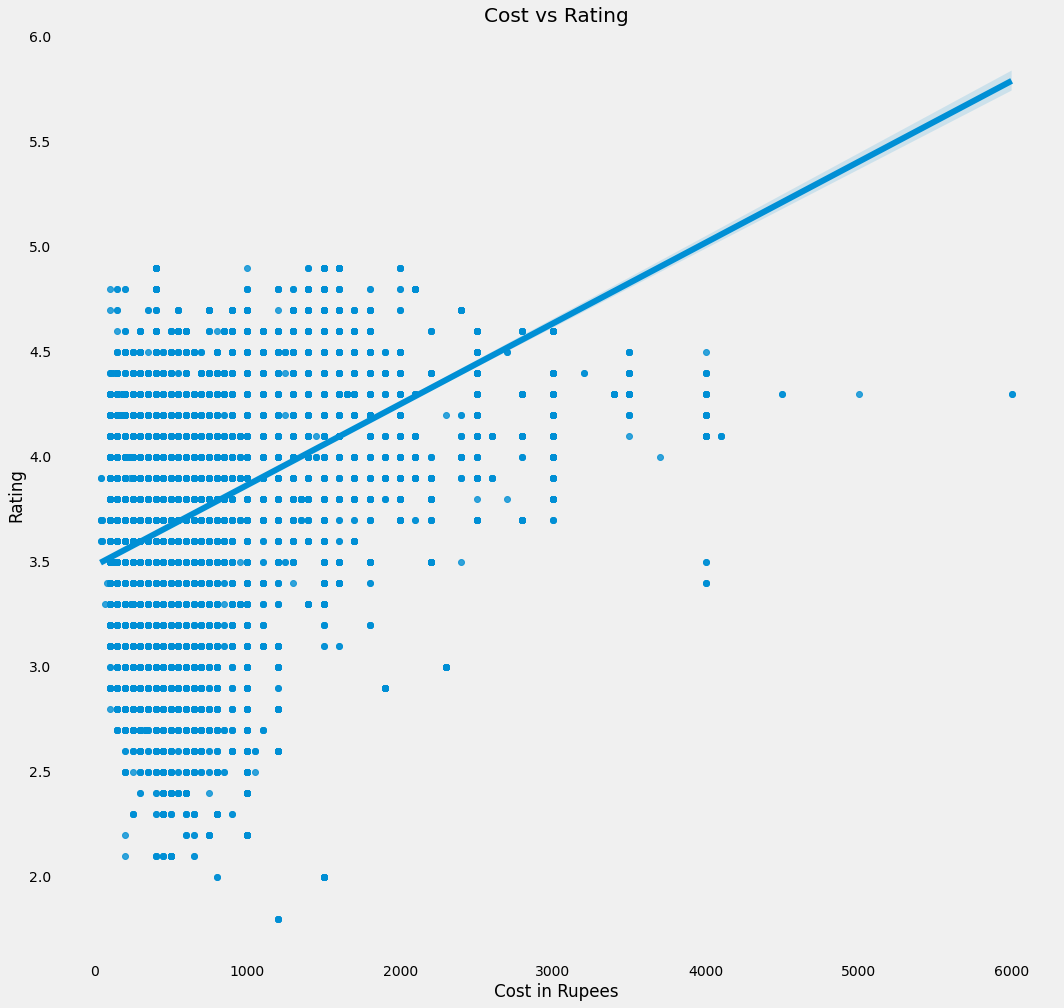

In [24]:
plt.figure(figsize=(16,16))

sns.regplot(x=df['approx_cost(for two people)'],y=df['rate']);
plt.xlabel("Cost in Rupees")
plt.ylabel("Rating")
plt.grid()
plt.title("Cost vs Rating");

#### No, actually its the opposite, usually restaurants which provide costly services are rated highly

<a id='q5'></a>

### Q5: Is there any linear correlation(where an increase/decrease of a value indicates a change in the value of another proportionally) between any of the numerical columns in this dataset?

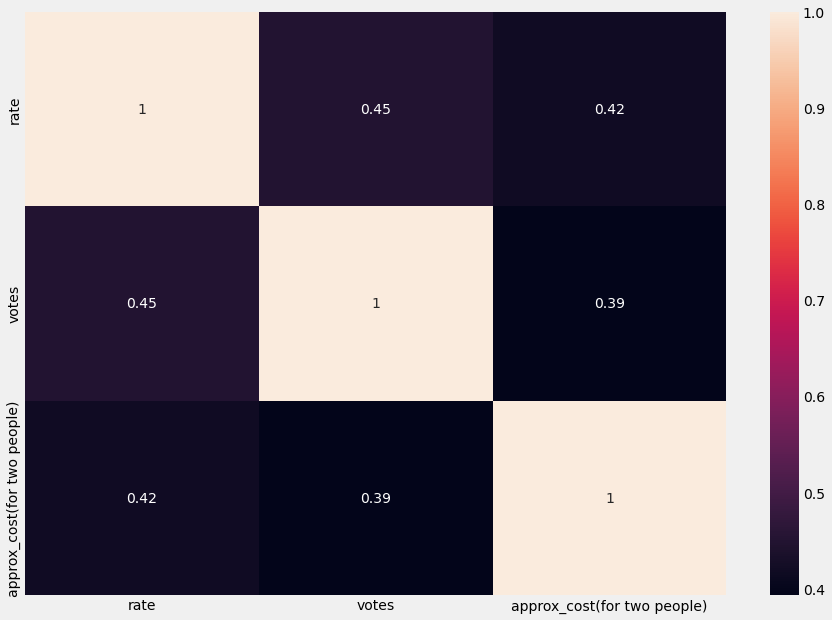

In [25]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True);

#### There seems to be a moderate correlation between **rate** and **vote**, but it is a week cause to think either of them causes another(there might be a confounding variable), and a week correlation between **approx_cost(for two people)** and **votes**,**approx_cost(for two people)** and **rate**

<a id='q6'></a>

### Q6: Which cities have the highest purchasing power in Bangalore?

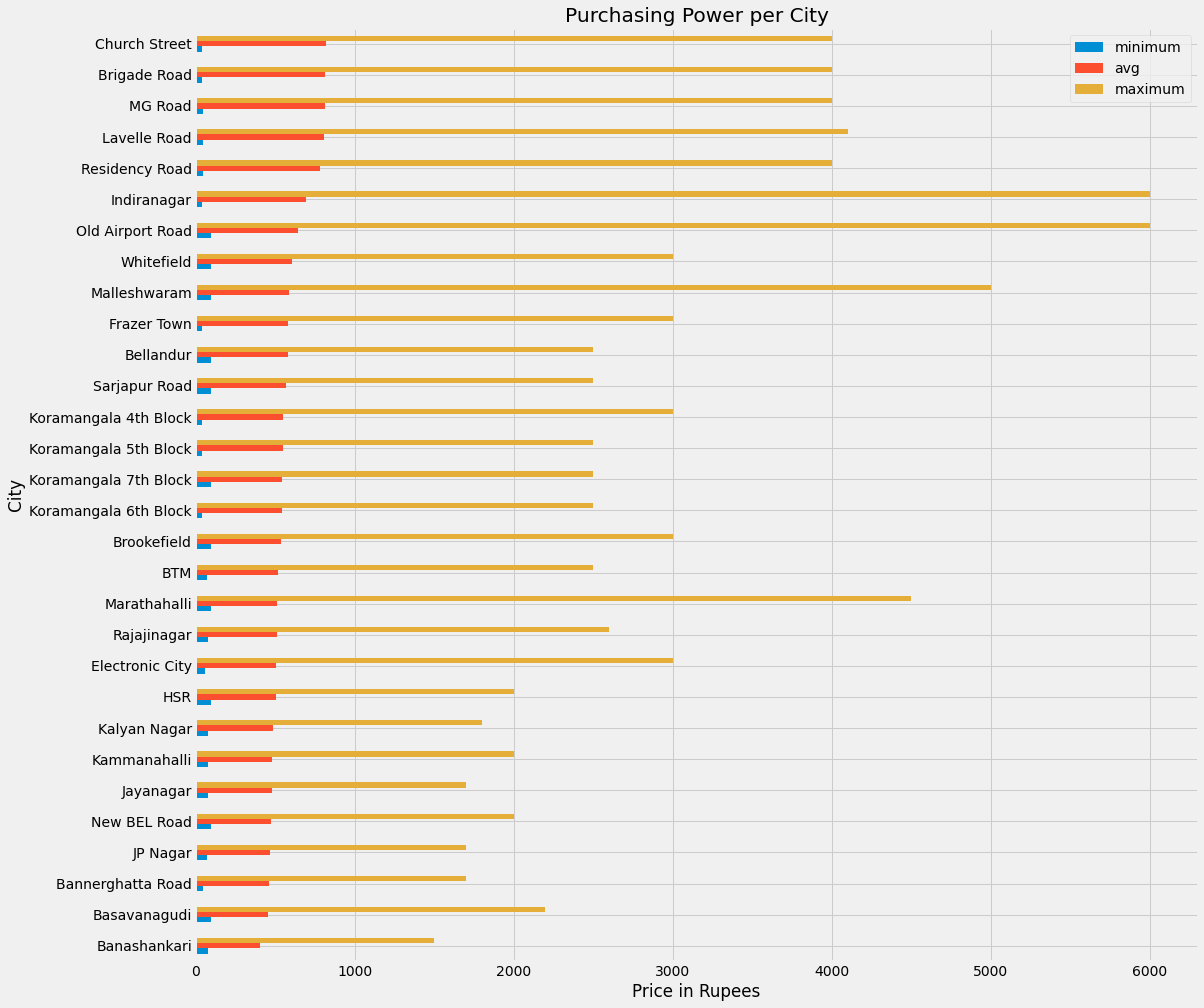

In [26]:
q6=df.groupby('listed_in(city)').agg(minimum=('approx_cost(for two people)','min'),avg=('approx_cost(for two people)','mean'),maximum=('approx_cost(for two people)','max')).sort_values(by='avg')
q6.plot(kind='barh',figsize=(16,16));
plt.title('Purchasing Power per City');
plt.xlabel('Price in Rupees');
plt.ylabel('City');

#### **Church Street** has the highest purchasing power (usually cities with higher percentage of high class citizens), while **Banashankari** has the lowest purchasing power

<a id='q7'></a>

### Q7: Does a restuarant have a higher average rating if it has both a book table reservation and online order?

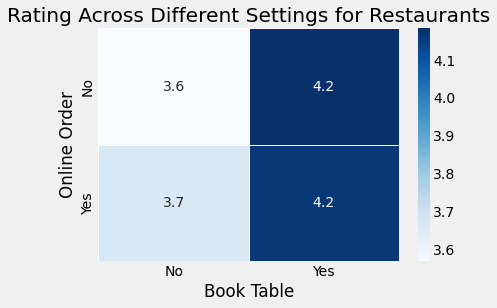

In [27]:
q7=df.groupby(['online_order','book_table'])['rate'].mean()
l=[[q7[0],q7[1]],[q7[2],q7[3]]]
ax = sns.heatmap(l, linewidth=0.5,annot=True,cmap='Blues')
labelx = [item.get_text() for item in ax.get_xticklabels()]
labelx = ['No','Yes']
labely = [item.get_text() for item in ax.get_yticklabels()]
labely = ['No','Yes']
ax.set_xticklabels(labelx)
ax.set_yticklabels(labely)
plt.ylabel('Online Order')
plt.xlabel('Book Table')
plt.title('Rating Across Different Settings for Restaurants')
plt.show()

#### Usually restuarants which has a Book Table has noticably higher ratings than any other setting

<a id='wrangling'></a>

> ## Data Wrangling

### Information about the numerical features in the dataset

In [28]:
df.describe()

,rate,votes,approx_cost(for two people)
count,48125.000000,59444.000000,59017.000000
mean,3.724763,330.297271,582.869868
std,0.448068,922.746953,462.686832
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.800000,44.000000,400.000000
75%,4.000000,221.000000,700.000000
max,4.900000,16832.000000,6000.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59444 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          59444 non-null  object 
 1   address                      59444 non-null  object 
 2   name                         59444 non-null  object 
 3   online_order                 59444 non-null  object 
 4   book_table                   59444 non-null  object 
 5   rate                         48125 non-null  float64
 6   votes                        59444 non-null  int64  
 7   phone                        58045 non-null  object 
 8   location                     59423 non-null  object 
 9   rest_type                    59444 non-null  object 
 10  dish_liked                   28152 non-null  object 
 11  cuisines                     59395 non-null  object 
 12  approx_cost(for two people)  59017 non-null  float64
 13  reviews_list    

#### We deduce that there are some NA values in our dataset

In [30]:
def missing_cols(df):
    """missing_cols _summary_

    Parameters
    ----------
    df : pd.DataFrame
        this function takes a DataFrame and finds the columns with missing values

    Returns
    -------
    list: str
        return any column that has a na value
    """
    return df.columns[df.isnull().any()]

In [31]:
for i in missing_cols(df): # returns the missing columns name in a given dataset
    print(i)

rate
phone
location
dish_liked
cuisines
approx_cost(for two people)


#### The columns above has missing values, first lets decide whether we will drop any of them

#### Now, lets deal with **phone** column, since this column does not provide useful info that could be genralized, and also it is multivalued (maybe number of phone numbers per customer), I think the best course of action is to remove it

In [32]:
df.drop(['phone'],axis=1,inplace=True)

#### There is a bit of confusion between **location** and **listed_in(city)** are very similar, **listed_in(city)** indicates that a specific restaurant privdes its services there, while other **location** indicates which city the restuarant adddress is located exactly, so I will drop **location**

In [33]:
df.drop(['location'],axis=1,inplace=True)

#### No useful info can be extracted directly from the **url**, **address**, **name** and **menu_item** so I will drop them

In [34]:
df.drop(['url','address','menu_item','name'],axis=1,inplace=True)

### The **reviews_list** column seems to be useful to provide average rating but the **rate** column already provides this info so its redundant, also it provide textual reviews which we could use for sentiment analysis but it is too complex to extract useful data from (maybe using a naive bayes, nlp model will help but this is far from the scope of EDA or the task itself), so I will drop this column

In [35]:
df.drop(['reviews_list'],axis=1,inplace=True)

In [36]:
for i in missing_cols(df): # returns the missing columns name in a given dataset
    print(i)

rate
dish_liked
cuisines
approx_cost(for two people)


#### Lets find the percentage of missing value in **rate**  column

In [37]:
def percentage_missing(df,col_name):
    return df[col_name].isnull().sum() * 100 / len(df)
    

In [38]:
percentage_missing(df,'rate')

19.041450777202073

#### 19% of missing values in **rate** column, I will impute them using the median value of **rate**

In [39]:
df['rate']=df['rate'].fillna(value=df['rate'].median())

#### We know that **approx_cost(for two people)** has missing values,

In [40]:
percentage_missing(df,'approx_cost(for two people)')

0.7183231276495525

#### this is a small percentage that we can drop without losing much information

In [41]:
df=df.dropna(subset=['approx_cost(for two people)'],axis=0)

#### for **dish_liked** column lets see the percentage of missing values

In [42]:
percentage_missing(df,'dish_liked')

52.611959265974214

#### This is half the size of the dataset :( , I will impute any missing value using the mode

In [43]:
mode=df['dish_liked'].mode()[0]
mode

'Biryani'

In [44]:
df['dish_liked']=df['dish_liked'].fillna(value=mode)

#### for **cuisines** column lets see the percentage of missing values

In [45]:
percentage_missing(df,'cuisines')

0.03897182167849941

#### So since the percentage is very small we can drop this or not without much effect, I will drop them

In [46]:
df=df.dropna(subset=['cuisines'],axis=0)

#### After data wrangling lets check if any column has missing values

In [47]:
for i in missing_cols(df):
    print(i)

#### No missing values in our dataset :)

#### Now lets one-hot encode **online_order**, **book_table** columns

In [48]:
def one_hot_encode(string: str):
    """one_hot_encode _summary_

    Parameters
    ----------
    string : str
        A string that has a 'yes' or 'no' value, this function only one-hot encode binary columns (columns with binary values)

    Returns
    -------
    int/bool
        
    """
    
    if string.lower()=='yes':
        return 1
    elif string.lower()=='no':
        return 0

In [49]:
df['online_order']=df['online_order'].apply(one_hot_encode)
df['book_table']=df['book_table'].apply(one_hot_encode)

#### a final problem remains, we need to standardize the format of **dish_liked** and **cuisines** since they are multivalued **(feature enigneering)**

In [50]:
df['dish_liked']=df['dish_liked'].apply(multivalue_to_list,args=(',')) # convert dish_liked to be 1nf
df=df.explode('dish_liked')

df['cuisines']=df['cuisines'].apply(multivalue_to_list,args=(',')) # convert cuisines to be 1nf
df=df.explode('cuisines')

In [51]:
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1,775,Casual Dining,Pasta,North Indian,800.0,Buffet,Banashankari
0,1,1,4.1,775,Casual Dining,Pasta,Mughlai,800.0,Buffet,Banashankari
0,1,1,4.1,775,Casual Dining,Pasta,Chinese,800.0,Buffet,Banashankari
0,1,1,4.1,775,Casual Dining,Lunch Buffet,North Indian,800.0,Buffet,Banashankari
0,1,1,4.1,775,Casual Dining,Lunch Buffet,Mughlai,800.0,Buffet,Banashankari


#### We can use either label encode the categorical columns to use later in our models, or one hot encode them, each has its disadvantages but one-hot encoding is better for accurate results, unfortunately my device cant handle such task , so I will stick with label encoding

In [52]:
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1,775,Casual Dining,Pasta,North Indian,800.0,Buffet,Banashankari
0,1,1,4.1,775,Casual Dining,Pasta,Mughlai,800.0,Buffet,Banashankari
0,1,1,4.1,775,Casual Dining,Pasta,Chinese,800.0,Buffet,Banashankari
0,1,1,4.1,775,Casual Dining,Lunch Buffet,North Indian,800.0,Buffet,Banashankari
0,1,1,4.1,775,Casual Dining,Lunch Buffet,Mughlai,800.0,Buffet,Banashankari


In [53]:
#df=pd.get_dummies(df, columns = ['rest_type','dish_liked','cuisines','listed_in(city)','listed_in(type)'])
#df['rest_type']=df['rest_type'].apply(LabelEncoder().fit_transform)
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objList = df.select_dtypes(include = "object").columns
print (objList)
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

df.head()

Index(['rest_type', 'dish_liked', 'cuisines', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')


,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1,775,22,3269,165,800.0,0,1
0,1,1,4.1,775,22,3269,68,800.0,0,1
0,1,1,4.1,775,22,3269,25,800.0,0,1
0,1,1,4.1,775,22,1462,165,800.0,0,1
0,1,1,4.1,775,22,1462,68,800.0,0,1


<a id='ml'></a>

> ## Machine Learning Models


<ul>
<li><a href="#m1">Logisitc Regression</a></li>
<li><a href="#m2">Random Forest</a></li>
<li><a href="#m4">XGBoost</a></li>
</ul>

#### Lets first create the target column and split our data for training and validation

In [54]:
df['target']=0 # declare a column named target

In [55]:
df['target'][df['rate']>=3.75]=1; # target is equal to 1 if the corresponding rate is >= 3.75
df['target'][df['rate']<3.75]=0; # target is equal to 0 if the corresponding rate is < 3.75
y=df['target']
df.drop(['target'],axis=1,inplace=True)
X=df

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=77) # I set the seed manually for reproducible results when testing

In [57]:
def metricss(y_test,y_pred):
    acc=metrics.accuracy_score(y_test, y_pred)*100
    precision=metrics.precision_score(y_test, y_pred)*100
    recall=metrics.recall_score(y_test, y_pred)*100
    return acc,precision,recall

<a id='m1'></a>

### Logistic Regression

In [58]:
lr =  LogisticRegression()
X_train.drop(['rate'],inplace=True,axis=1)# I did not recieve an instruction to remove rate column based on the task document but I removed it since I will gain a 100% accuaracy,precision,recall if I did not, also the program will determine this easy pattern of classifiying effortlessly
X_test.drop(['rate'],inplace=True,axis=1)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [59]:
results=metricss(y_test,y_pred)
print("Accuracy:",results[0],'%')
print("Precision:",results[1],'%')
print("Recall:",results[2],'%')

Accuracy: 79.77504027114351 %
Precision: 81.68341733324128 %
Recall: 96.3358458961474 %


<a id='m2'></a>

### Random Forest

In [60]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [61]:
results=metricss(y_test,y_pred)
print("Accuracy:",results[0],'%')
print("Precision:",results[1],'%')
print("Recall:",results[2],'%')

Accuracy: 99.5698203860443 %
Precision: 99.8298328632369 %
Recall: 99.6324213660897 %


<a id='m4'></a>

### XGBoost

In [62]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred=XGB.predict(X_test)

[01:36:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
results=metricss(y_test,y_pred)
print("Accuracy:",results[0],'%')
print("Precision:",results[1],'%')
print("Recall:",results[2],'%')

Accuracy: 94.94119947484566 %
Precision: 96.28714293924938 %
Recall: 97.43741857435325 %


<a id='hpt'></a>

> ## Hyperparameter Tuning


#### We can tune the depth of the random forest tree or the number of iteration untill convergance, using an optimal value for such hyper paramter will increase performance and be immensely useful when deploying the models for production

### The best performing Algorithm is the Random Forest with a 99% accuaracy, I will use Grid Search Cross-Validation to find the best number of trees for each model and the depth for each of them

In [64]:
max_depth = [int(x) for x in np.linspace(10, 40, num = 4)]
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 4)] 

In [65]:
search_grid = {'n_estimators': n_estimators, # number of trees used for decision
               'max_depth': max_depth} # maximum depth of a single tree

In [66]:
rf_random = GridSearchCV(estimator = rf, param_grid = search_grid, cv = 2,verbose=3)
rf_random.fit(X_train, y_train) # due to the sheer size of the parameters this line will take a long time to execute so I used few combinations in max_depth and n_estimators
# better parameters can be obtained by changing the max_depth, n_estimators nums and range parameters

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END ....max_depth=10, n_estimators=200;, score=0.886 total time=  33.7s
[CV 2/2] END ....max_depth=10, n_estimators=200;, score=0.887 total time=  32.4s
[CV 1/2] END ....max_depth=10, n_estimators=333;, score=0.886 total time=  59.6s
[CV 2/2] END ....max_depth=10, n_estimators=333;, score=0.886 total time=  59.8s
[CV 1/2] END ....max_depth=10, n_estimators=466;, score=0.886 total time= 1.4min
[CV 2/2] END ....max_depth=10, n_estimators=466;, score=0.887 total time= 1.4min
[CV 1/2] END ....max_depth=10, n_estimators=600;, score=0.885 total time= 1.8min
[CV 2/2] END ....max_depth=10, n_estimators=600;, score=0.887 total time= 1.8min
[CV 1/2] END ....max_depth=20, n_estimators=200;, score=0.980 total time=  48.7s
[CV 2/2] END ....max_depth=20, n_estimators=200;, score=0.982 total time=  48.2s
[CV 1/2] END ....max_depth=20, n_estimators=333;, score=0.981 total time= 1.4min
[CV 2/2] END ....max_depth=20, n_estimators=333;

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [200, 333, 466, 600]},
             verbose=3)

In [67]:
rf_best=rf_random.best_params_

In [68]:
rf_new= RandomForestClassifier(max_depth=rf_best['max_depth'],n_estimators=rf_best['n_estimators'])
rf_new.fit(X_train,y_train)
y_pred=rf_new.predict(X_test)

In [69]:
results=metricss(y_test,y_pred)
print("Accuracy:",results[0],'%')
print("Precision:",results[1],'%')
print("Recall:",results[2],'%')

Accuracy: 99.5726137601609 %
Precision: 99.82751587902803 %
Recall: 99.63823748371487 %


In [70]:
rf_best

{'max_depth': 40, 'n_estimators': 600}

#### The best combinations are displayed above for a 2-CV Grid Search on 16 parameters

<a id='summary'></a>

> ## Summary and Intrepretation

1. **Church Street** has both higher purchasing power and average rating which I don't think is a coincidence, Zomato ought to understand what is confounding factors in such success, and improve other cities like **Electronic City**
2. Having a book table reservation support provides massive coconvenience to customers and further improves their experience, therefore increasing average rating noticeably
3. No apparent correlation between any numerical column which can be used to predict another column value
4. Restaurants which provide a high-class expensive service tend to have great rating, which is not the case for mid/low-class restaurants
5. **Quick Bites** restaurants type is the most common, where customers can grab a quick meal to eat while commuting or working 